In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf

In [4]:
df = pd.read_csv("prices.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'prices.csv'

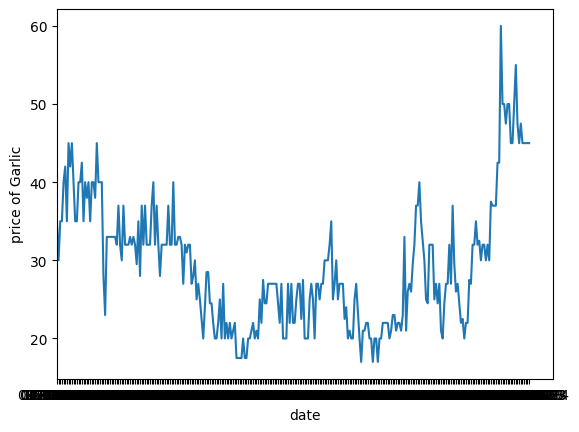

In [25]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

# Assuming 'df' is your DataFrame with the provided data

# Select relevant features and target variable
features = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
target = df['isFraud']

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_standardized)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Plot the decision boundary
plt.figure(figsize=(10, 6))

h = .02  # step size in the mesh
x_min, x_max = features_pca[:, 0].min() - 1, features_pca[:, 0].max() + 1
y_min, y_max = features_pca[:, 1].min() - 1, features_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot the data points
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=target, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary and Dimensionality of the Data')
plt.show()


In [26]:
cols = df.columns
cols


Index(['Price Dates', 'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
       'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
       'Elephant Yam (Suran)'],
      dtype='object')

In [38]:
query = """
        SELECT * FROM data
        WHERE `O` < 40
        """


In [39]:
df = sqldf(query)
df

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
...,...,...,...,...,...,...,...,...,...,...,...
247,27-12-2023,45.0,16,30.0,20,70,260,40,16,40.0,25
248,28-12-2023,45.0,16,30.0,20,70,260,30,20,45.0,25
249,29-12-2023,45.0,16,30.0,22,80,260,30,18,50.0,25
250,31-12-2023,45.0,16,26.0,20,60,250,40,16,50.0,40


In [251]:

df['areaname_numeric'] = pd.factorize(df['areaname'])[0]
df['income'] = pd.to_numeric(df['income'])

# Drop the original categorical column if needed
#df = df.drop('areaname', axis=1)

# Display the resulting DataFrame
df

KeyError: 'areaname'

In [132]:
cols = df.columns
cols

Index(['stateabbrv', 'statename', 'stfips', 'areatyname', 'areaname',
       'areatype', 'area', 'periodyear', 'periodtype', 'pertypdesc', 'period',
       'inctype', 'incdesc', 'incsource', 'incsrcdesc', 'income', 'incrank',
       'population', 'releasedate', 'areaname_numeric'],
      dtype='object')

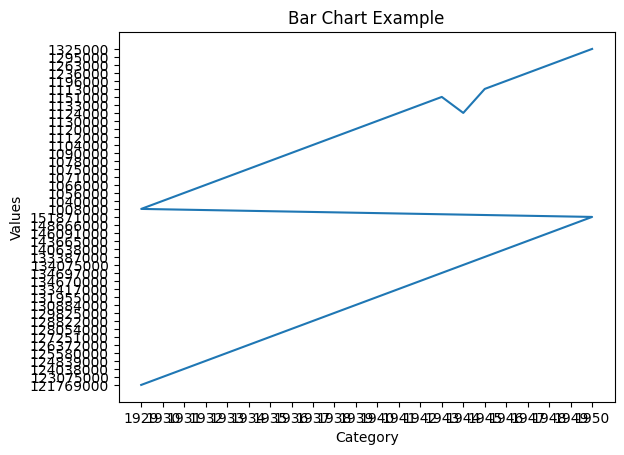

In [133]:


# Add labels and title
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Bar Chart Example')
plt.plot(df['periodyear'], df['population'])
# Show the plot
plt.show()